In [103]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
## reading data, droping irrelevant columns, standardizing header names, checking types etc..

In [104]:
data = pd.read_csv('C:/Users/ivanr/Downloads/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [105]:
data = data.drop(['PassengerId', 'Name'], axis = 1)

In [106]:
data.columns = list(map(lambda x: x.lower(), data.columns))

In [107]:
data.head()

,survived,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   ticket    891 non-null    object 
 7   fare      891 non-null    float64
 8   cabin     204 non-null    object 
 9   embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [109]:
data.nunique()

survived      2
pclass        3
sex           2
age          88
sibsp         7
parch         7
ticket      681
fare        248
cabin       147
embarked      3
dtype: int64

In [110]:
data.isna().sum()/len(data)*100

survived     0.000000
pclass       0.000000
sex          0.000000
age         19.865320
sibsp        0.000000
parch        0.000000
ticket       0.000000
fare         0.000000
cabin       77.104377
embarked     0.224467
dtype: float64

In [ ]:
# checking features

In [111]:
data['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [ ]:
## this shows us that travelers from the first class have more chance to survive

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


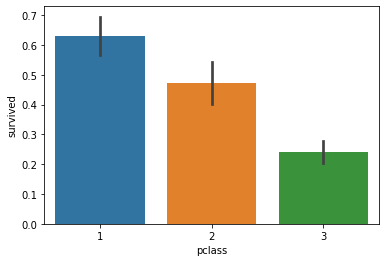

In [112]:
sns.barplot (data['pclass'], data['survived'])
plt.show()

In [33]:
## females have more chance for surviving

In [113]:
pd.crosstab(data['survived'], data['sex'])

sex,female,male
survived,,
0,81,468
1,233,109


C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

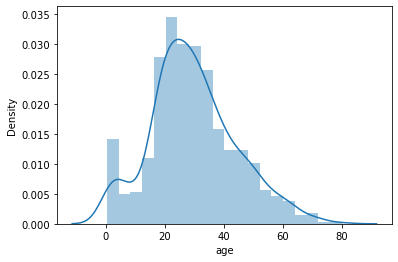

In [114]:
sns.distplot(data['age'])


C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

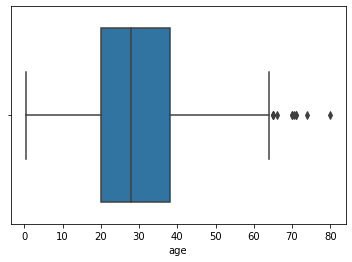

In [115]:
sns.boxplot(data['age'])

In [116]:
temp_age = data[data['age'].isna()== False]['age']

In [117]:
median_age = np.median(temp_age)


In [118]:
data['age'] = data['age'].fillna(median_age)

In [119]:
data['age'].isna().sum()

0

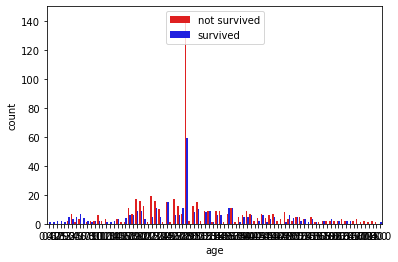

In [120]:

sns.countplot(x = "age", hue = "survived", data = data, palette=["r", "b"]).legend(labels = ["not survived", "survived"])

In [121]:
data['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

In [122]:
data['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [123]:
data['parch'] = list(map(lambda x: str(x), data['parch']))


In [124]:
def clean_parch(x):
    if x in ['5', '6', '3', '4']:
        return '2'
    else:
        return x

In [125]:
data['parch'] = list(map(clean_parch, data['parch']))

In [126]:
data['parch'].value_counts()

0    678
1    118
2     95
Name: parch, dtype: int64

In [ ]:
## since pclass represent ticket class, and ticket column have a lot of null values, we are droping ticket


In [127]:
data = data.drop('ticket', axis = 1)


In [128]:
data['cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [129]:
def clean_cabin(x):
    if pd.isna(x):
        return np.nan
    else:
        return x[0]

In [130]:
data['cabin'] = list(map(clean_cabin, data['cabin']))

In [131]:
data['cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: cabin, dtype: int64

In [132]:
def group_cabin(x):
    if x == 'T':
        return 'F'
    elif x == 'G':
        return 'F'
    else:
        return x

In [133]:
data['cabin'] = list(map(group_cabin, data['cabin']))

In [134]:
data['cabin'].value_counts()

C    59
B    47
D    33
E    32
F    18
A    15
Name: cabin, dtype: int64

In [135]:
data['cabin'] = data['cabin'].fillna('C')

In [136]:
data['cabin'].isna().sum()

0

In [137]:
data['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [138]:
data['embarked'] = data['embarked'].fillna('S')

In [139]:
data['embarked'].value_counts()

S    646
C    168
Q     77
Name: embarked, dtype: int64

In [140]:
data.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
dtype: int64

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


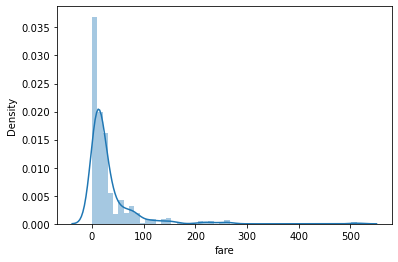

In [145]:
sns.distplot(data['fare'])
plt.show()

In [146]:
crt_fare = list(map(lambda x: x**0.333, data['fare']))

C:\Users\ivanr\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

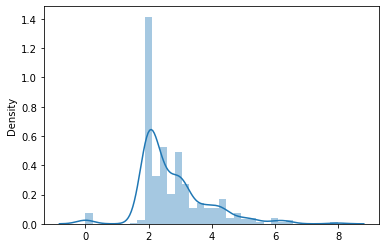

In [147]:
sns.distplot(crt_fare)

In [148]:
def log_tranform(x):
    if x<=0:
        return 0
    else:
        return np.log(x)

In [149]:
log_fare = list(map(log_tranform, data['fare']))

In [150]:
numericals = data.select_dtypes(np.number)

In [151]:
categoricals = data.select_dtypes(np.object)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_22336\591748084.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricals = data.select_dtypes(np.object)


In [152]:
corr_matrix = numericals.corr()

<AxesSubplot:>

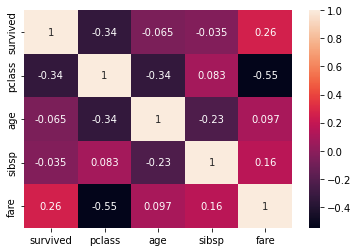

In [153]:
sns.heatmap(corr_matrix, annot = True)

In [154]:
y = data['survived']
x = data.drop('survived', axis = 1)

In [156]:
x_numeric = x.select_dtypes(np.number)

In [157]:
x_categoric = x.select_dtypes(np.object)

C:\Users\ivanr\AppData\Local\Temp\ipykernel_22336\2321890632.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_categoric = x.select_dtypes(np.object)


In [158]:
scaled = Normalizer().fit_transform(numericals)
scaled = pd.DataFrame(scaled)
scaled

,0,1,2,3,4
0,0.000000,0.128322,0.941028,0.042774,0.310112
1,0.012377,0.012377,0.470309,0.012377,0.882241
2,0.036544,0.109632,0.950143,0.000000,0.289611
3,0.015718,0.015718,0.550134,0.015718,0.834632
4,0.000000,0.083243,0.971173,0.000000,0.223370
...,...,...,...,...,...
886,0.000000,0.066593,0.899002,0.000000,0.432853
887,0.028138,0.028138,0.534628,0.000000,0.844150
888,0.000000,0.081835,0.763790,0.027278,0.639674
889,0.025174,0.025174,0.654515,0.000000,0.755210


In [159]:
x_categoric

,sex,parch,cabin,embarked
0,male,0,C,S
1,female,0,C,C
2,female,0,C,S
3,female,0,C,S
4,male,0,C,S
...,...,...,...,...
886,male,0,C,S
887,female,0,B,S
888,female,2,C,S
889,male,0,C,C


In [160]:
encoded = OneHotEncoder(drop='first').fit_transform(x_categoric).toarray()
encoded = pd.DataFrame(encoded) 
encoded

,0,1,2,3,4,5,6,7,8,9
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
888,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
889,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [161]:
features = pd.concat([scaled, encoded], axis = 1)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.1, random_state=42)

In [163]:
X_train.shape

(801, 15)

In [164]:
X_test.shape

(90, 15)

In [165]:
model = LogisticRegression(multi_class='ovr').fit(X_train, y_train)

In [166]:
predictions = model.predict(X_test)

In [167]:
accuracy_score(y_test, predictions)

0.8333333333333334